In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import (accuracy_score, 
                            classification_report,
                            recall_score, precision_score, f1_score,
                            confusion_matrix)

from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("RTA Dataset.csv")

In [3]:
data.shape

(12316, 32)

In [4]:
data.head(5)

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3   1:06:00      Sunday              18-30          Male  Junior high school   
4   1:06:00      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0               NaN                  NaN    Not a Pedestrian   
1               NaN                  NaN    Not a Pedestrian   
2            Driver                  NaN    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4               NaN                  NaN    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

1.EDA

In [5]:
#Converting "Time" to datetime
data["Time"] = pd.to_datetime(data['Time'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Time                         12316 non-null  datetime64[ns]
 1   Day_of_week                  12316 non-null  object        
 2   Age_band_of_driver           12316 non-null  object        
 3   Sex_of_driver                12316 non-null  object        
 4   Educational_level            11575 non-null  object        
 5   Vehicle_driver_relation      11737 non-null  object        
 6   Driving_experience           11487 non-null  object        
 7   Type_of_vehicle              11366 non-null  object        
 8   Owner_of_vehicle             11834 non-null  object        
 9   Service_year_of_vehicle      8388 non-null   object        
 10  Defect_of_vehicle            7889 non-null   object        
 11  Area_accident_occured        12077 non-nu

In [7]:
data.describe(include = ['O']).T

count unique  \
Day_of_week              12316      7   
Age_band_of_driver       12316      5   
Sex_of_driver            12316      3   
Educational_level        11575      7   
Vehicle_driver_relation  11737      4   
Driving_experience       11487      7   
Type_of_vehicle          11366     17   
Owner_of_vehicle         11834      4   
Service_year_of_vehicle   8388      6   
Defect_of_vehicle         7889      3   
Area_accident_occured    12077     14   
Lanes_or_Medians         11931      7   
Road_allignment          12174      9   
Types_of_Junction        11429      8   
Road_surface_type        12144      5   
Road_surface_conditions  12316      4   
Light_conditions         12316      4   
Weather_conditions       12316      9   
Type_of_collision        12161     10   
Vehicle_movement         12008     13   
Casualty_class           12316      4   
Sex_of_casualty          12316      3   
Age_band_of_casualty     12316      6   
Casualty_severity        12316      4   
Work_of_casuality         9118      7   
Fitness_of_casuality      9681      5   
Pedestrian_movement      12316      9   
Cause_of_accident        12316     20   
Accident_severity        12316      3   

                                                                      top  \
Day_of_week                                                        Friday   
Age_band_of_driver                                                  18-30   
Sex_of_driver                                                        Male   
Educational_level                                      Junior high school   
Vehicle_driver_relation                                          Employee   
Driving_experience                                                 5-10yr   
Type_of_vehicle                                                Automobile   
Owner_of_vehicle                                                    Owner   
Service_year_of_vehicle                                           Unknown   
Defect_of_vehicle                                               No defect   
Area_accident_occured                                               Other   
Lanes_or_Medians         Two-way (divided with broken lines road marking)   
Road_allignment                            Tangent road with flat terrain   
Types_of_Junction                                                 Y Shape   
Road_surface_type                                           Asphalt roads   
Road_surface_conditions                                               Dry   
Light_conditions                                                 Daylight   
Weather_conditions                                                 Normal   
Type_of_collision                          Vehicle with vehicle collision   
Vehicle_movement                                           Going straight   
Casualty_class                                            Driver or rider   
Sex_of_casualty                                                      Male   
Age_band_of_casualty                                                   na   
Casualty_severity                                                       3   
Work_of_casuality                                                  Driver   
Fitness_of_casuality                                               Normal   
Pedestrian_movement                                      Not a Pedestrian   
Cause_of_accident                                           No distancing   
Accident_severity                                           Slight Injury   

                          freq  
Day_of_week               2041  
Age_band_of_driver        4271  
Sex_of_driver            11437  
Educational_level         7619  
Vehicle_driver_relation   9627  
Driving_experience        3363  
Type_of_vehicle           3205  
Owner_of_vehicle         10459  
Service_year_of_vehicle   2883  
Defect_of_vehicle         7777  
Area_accident_occured     3819  
Lanes_or_Medians          4411  
Road_allignment          10459  
Types_of_Junction    

In [8]:
data.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [9]:
data.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [10]:
#print duplicates
print("Number of duplicates",data.duplicated().sum())
print("Unique Number of Values per column:")
data.nunique()

Number of duplicates 0
Unique Number of Values per column:


Time                           1074
Day_of_week                       7
Age_band_of_driver                5
Sex_of_driver                     3
Educational_level                 7
Vehicle_driver_relation           4
Driving_experience                7
Type_of_vehicle                  17
Owner_of_vehicle                  4
Service_year_of_vehicle           6
Defect_of_vehicle                 3
Area_accident_occured            14
Lanes_or_Medians                  7
Road_allignment                   9
Types_of_Junction                 8
Road_surface_type                 5
Road_surface_conditions           4
Light_conditions                  4
Weather_conditions                9
Type_of_collision                10
Number_of_vehicles_involved       6
Number_of_casualties              8
Vehicle_movement                 13
Casualty_class                    4
Sex_of_casualty                   3
Age_band_of_casualty              6
Casualty_severity                 4
Work_of_casuality           

In [11]:
data["hour"] = data["Time"].dt.hour
data["minute"] = data['Time'].dt.minute
data.drop('Time',axis = 1,inplace = True)

In [12]:
data.head()

Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0      Monday              18-30          Male   Above high school   
1      Monday              31-50          Male  Junior high school   
2      Monday              18-30          Male  Junior high school   
3      Sunday              18-30          Male  Junior high school   
4      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   

  Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  ...  \
0            Owner              Above 10yr         No defect  ...   
1            Owner                 5-10yrs         No defect  ...   
2            Owner                     NaN         No defect  ...   
3     Governmental                     NaN         No defect  ...   
4            Owner                 5-10yrs         No defect  ...   

  Sex_of_casualty Age_band_of_casualty Casualty_severity Work_of_casuality  \
0              na                   na                na               NaN   
1              na                   na                na               NaN   
2            Male                31-50                 3            Driver   
3          Female                18-30                 3            Driver   
4              na                   na                na               NaN   

  Fitness_of_casuality Pedestrian_movement           Cause_of_accident  \
0                  NaN    Not a Pedestrian             Moving Backward   
1                  NaN    Not a Pedestrian                  Overtaking   
2                  NaN    Not a Pedestrian   Changing lane to the left   
3               Normal    Not a Pedestrian  Changing lane to the right   
4                  NaN    Not a Pedestrian                  Overtaking   

  Accident_severity hour  minute  
0     Slight Injury   17       2  
1     Slight Injury   17       2  
2    Serious Injury   17       2  
3     Slight Injury    1       6  
4     Slight Injury    1       6  

[5 rows x 33 columns]

Univariate Analysis

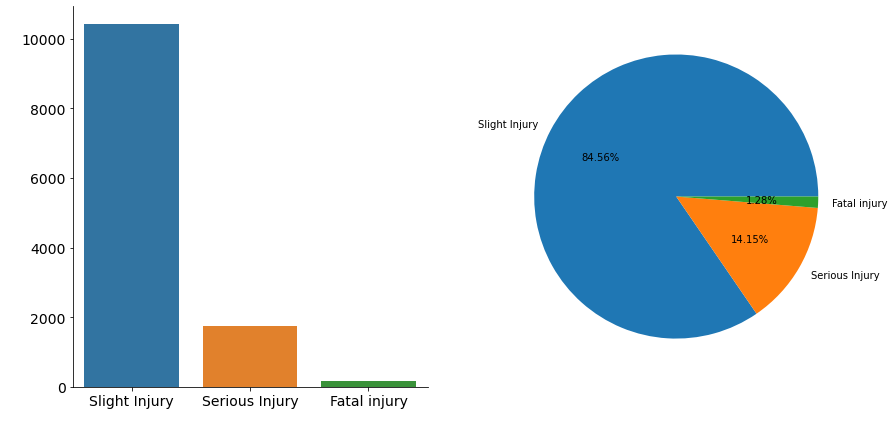

In [13]:
#Visualizing the target variable
plt.figure(figsize = (14,7))
#barplot
ax1 = plt.subplot(1,2,1)
cp = sns.countplot(x = data['Accident_severity'])
ax1.set_xlabel(' ')
ax1.set_ylabel(' ')
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
sns.despine(top = True,right = True)
#pieplot
ax2 = plt.subplot(1,2,2)
plt.pie(data['Accident_severity'].value_counts(),
        labels = list(data['Accident_severity'].unique()),
        autopct = '%1.2f%%'
       )
plt.show()

In [14]:
data.columns

Index(['Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity', 'hour', 'minute'],
      dtype='object')

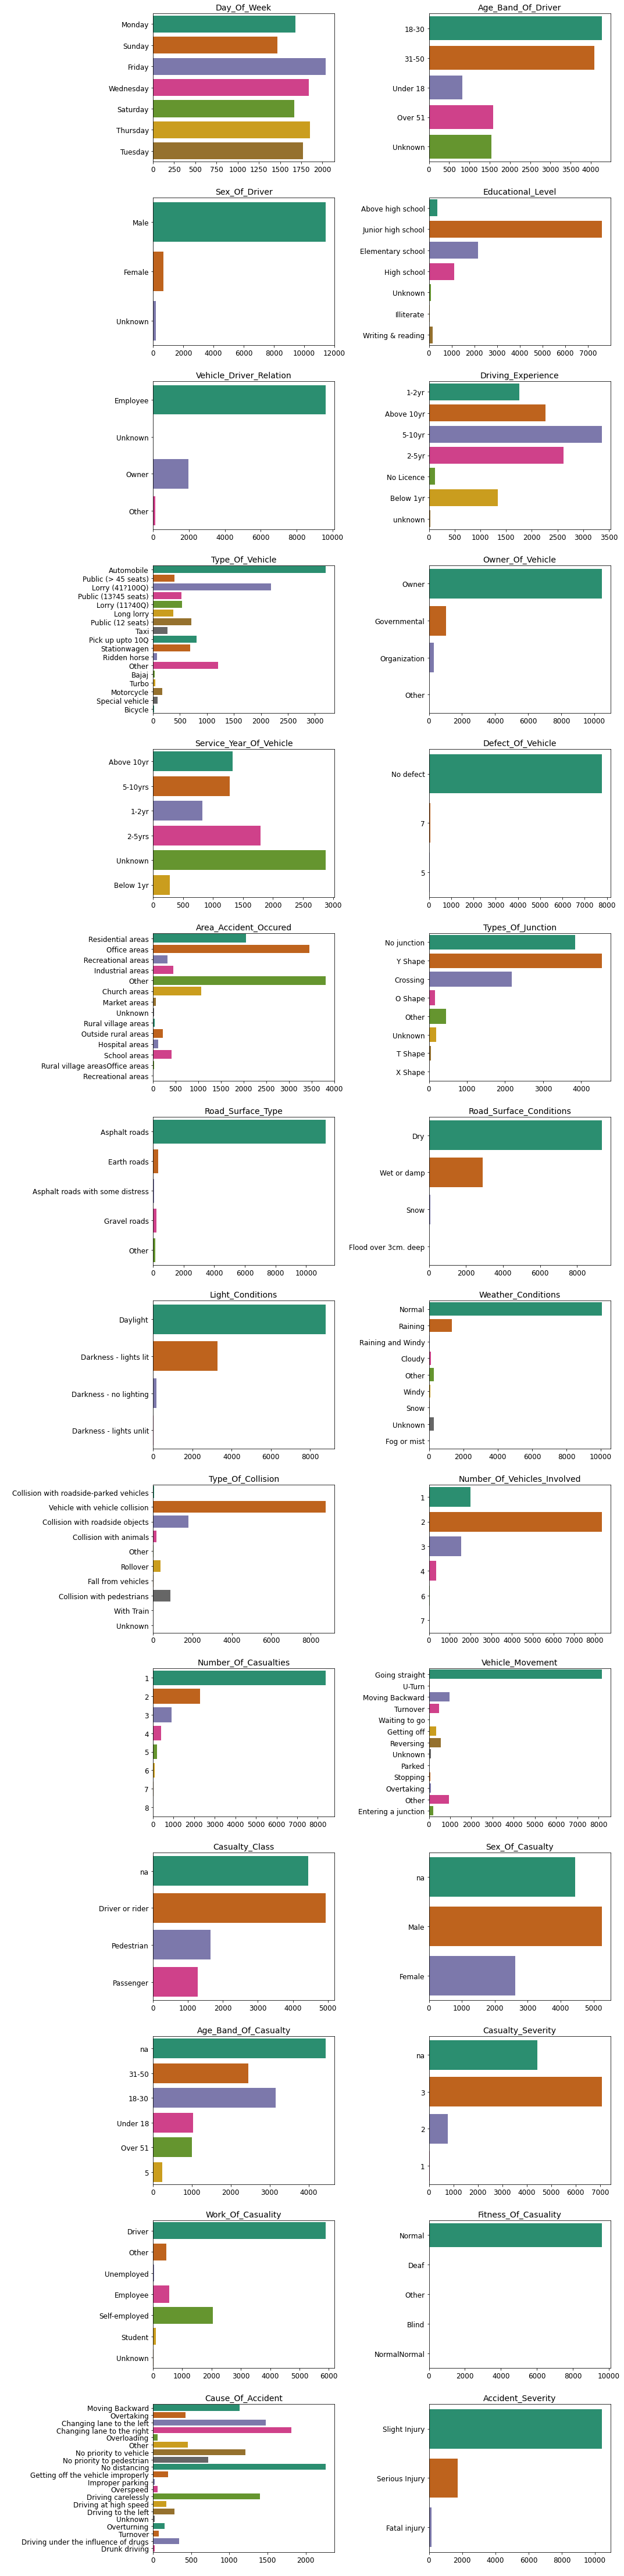

In [15]:
plt.figure(figsize = (15,70))
plotnumber = 1
for col in data.drop(['hour','minute','Lanes_or_Medians','Road_allignment','Pedestrian_movement'],axis = 1):
    if plotnumber<=data.shape[1]:
        ax1 = plt.subplot(16,2,plotnumber)
        sns.countplot(data = data,y = col,palette = 'Dark2')
        plt.xticks(fontsize = 12)
        plt.yticks(fontsize = 12)
        plt.title(col.title(),fontsize = 14)
        plt.xlabel(' ')
        plt.ylabel(' ')
    plotnumber+=1
plt.tight_layout()

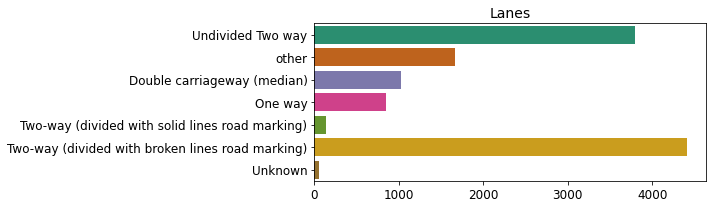

In [16]:
plt.figure(figsize=(10,3))
sns.countplot(data=data, y='Lanes_or_Medians', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Lanes', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

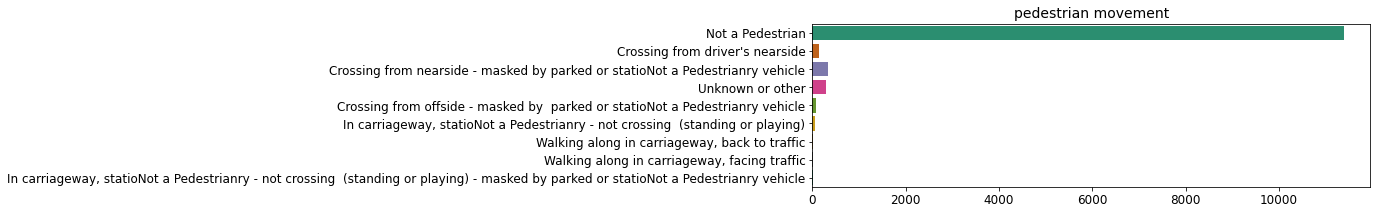

In [17]:
plt.figure(figsize=(10,3))
sns.countplot(data=data, y='Pedestrian_movement', palette = 'Dark2')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('pedestrian movement', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.show();

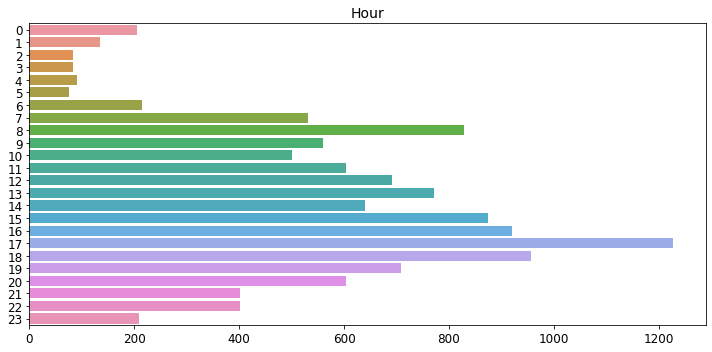

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, y='hour')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Hour', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

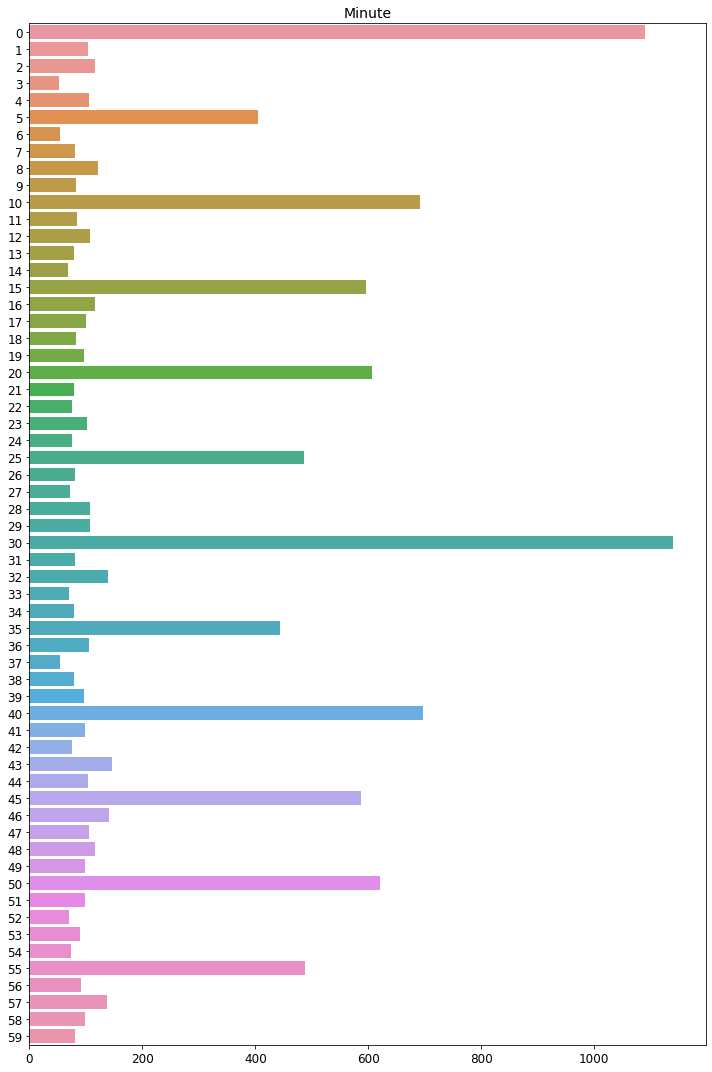

In [19]:
plt.figure(figsize=(10,15))
sns.countplot(data=data, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

#### Observations: 
 
 * Most of accidents involved 2 vehicles and 2 casualities
 * Occured on fridays and after noon hours

Most of the drivers :
 * are Male and age 18-30yrs age group
 * have only went upto junior high school and are employees
 * have 5-10 years of driving experience
Most of the accidents happened with personally owned passenger vehicles.

Most of the drivers have met with accident on:
* two-way lanes
* tangent road with flat terrains
* Y shaped junctions
* asphalt roads
* day time
* normal weather conditions

Most of the casualties:
* happened to physically fit male drivers
* are of severity 3

The conditions on which most of the drivers met with the accident are:
* vehicle to vehicle collision
* straight movement
* no pedestrian accidents

Not keeping enough distance between the vehicles was the major cause for most of the accidents and majority of the accidents resulted in slight injury.

* Most of the accidents have taken place between 3pm to 6pm with maximum numbers at 5 pm
* Most of the time in minutes seems to have been recorded in intervals of 5 minutes for the sake of convenience. Hence more numbers to be seen at the 0 and 30 minutes.


In [20]:
mint = list(range(5,56,5))
def convert_minutes(x:int):
    for m in mint:
        if x%m==x and x>m-5:
            return m
        if x in [56,57,58,59]:
            return 0
        if x in mint+[0]:
            return x    

In [21]:
data['minute'] = data['minute'].apply(lambda x: convert_minutes(x))

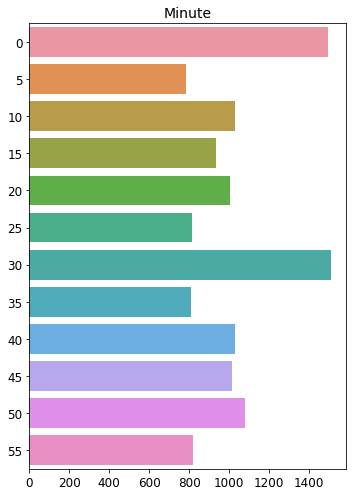

In [22]:
plt.figure(figsize=(5,7))
sns.countplot(data=data, y='minute')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Minute', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()

In [23]:
num_cols = data.dtypes[data.dtypes == 'int64'].index.tolist()
cat_cols = data.dtypes[data.dtypes != 'int64'].index.tolist()
data[cat_cols]

Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0          Monday              18-30          Male   Above high school   
1          Monday              31-50          Male  Junior high school   
2          Monday              18-30          Male  Junior high school   
3          Sunday              18-30          Male  Junior high school   
4          Sunday              18-30          Male  Junior high school   
...           ...                ...           ...                 ...   
12311   Wednesday              31-50          Male                 NaN   
12312      Sunday            Unknown          Male   Elementary school   
12313      Sunday            Over 51          Male  Junior high school   
12314      Sunday              18-30        Female  Junior high school   
12315      Sunday              18-30          Male  Junior high school   

      Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                    Employee              1-2yr           Automobile   
1                    Employee         Above 10yr  Public (> 45 seats)   
2                    Employee              1-2yr      Lorry (41?100Q)   
3                    Employee             5-10yr  Public (> 45 seats)   
4                    Employee              2-5yr                  NaN   
...                       ...                ...                  ...   
12311                Employee              2-5yr       Lorry (11?40Q)   
12312                Employee             5-10yr           Automobile   
12313                Employee             5-10yr                Bajaj   
12314                Employee         Above 10yr      Lorry (41?100Q)   
12315                Employee             5-10yr                Other   

      Owner_of_vehicle Service_year_of_vehicle Defect_of_vehicle  ...  \
0                Owner              Above 10yr         No defect  ...   
1                Owner                 5-10yrs         No defect  ...   
2                Owner                     NaN         No defect  ...   
3         Governmental                     NaN         No defect  ...   
4                Owner                 5-10yrs         No defect  ...   
...                ...                     ...               ...  ...   
12311            Owner                     NaN         No defect  ...   
12312            Owner                     NaN         No defect  ...   
12313            Owner                  2-5yrs         No defect  ...   
12314            Owner                  2-5yrs         No defect  ...   
12315            Owner                  2-5yrs         No defect  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
0       Going straight               na              na                   na   
1       Going straight               na              na                   na   
2       Going straight  Driver or rider            Male                31-50   
3       Going straight       Pedestrian          Female                18-30   
4       Going straight               na              na                   na   
...                ...              ...             ...                  ...   
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
0                    na               NaN                  NaN   
1                    na               NaN                  NaN   
2                     3            Driver                  NaN   
3                     3            Driver               Normal   
4                    na               NaN                  NaN   
...   

#### Preprocessing

In [24]:
data.isna().sum()[data.isna().sum() != 0]

Educational_level           741
Vehicle_driver_relation     579
Driving_experience          829
Type_of_vehicle             950
Owner_of_vehicle            482
Service_year_of_vehicle    3928
Defect_of_vehicle          4427
Area_accident_occured       239
Lanes_or_Medians            385
Road_allignment             142
Types_of_Junction           887
Road_surface_type           172
Type_of_collision           155
Vehicle_movement            308
Work_of_casuality          3198
Fitness_of_casuality       2635
dtype: int64

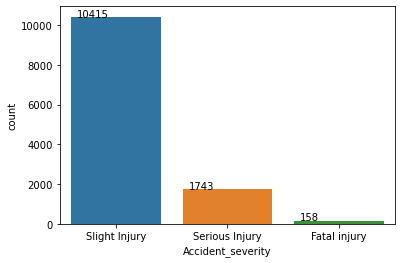

In [25]:
ax = sns.countplot(x = data['Accident_severity'])
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',(p.get_x()+0.05,p.get_height()+1))
plt.show()

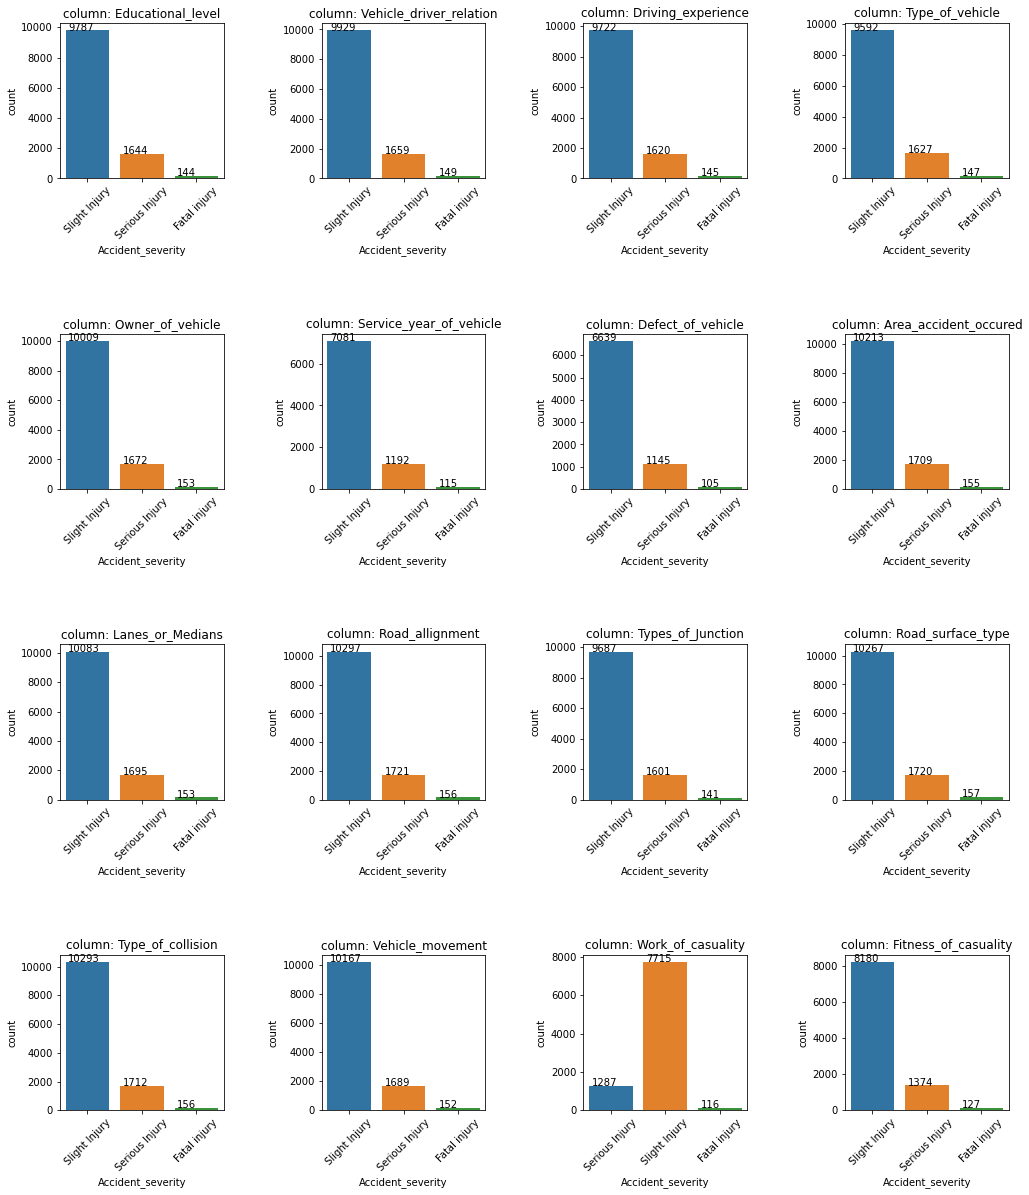

In [26]:
fig = plt.figure(figsize = (17,20))
fig.subplots_adjust(hspace=1, wspace=0.6)
cols = data.isna().sum()[data.isna().sum() != 0].index.tolist()
for i,col in enumerate(cols):
    ax = fig.add_subplot(4, 4, i+1)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
    sns.countplot(x=data.dropna(subset=[col])["Accident_severity"])
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x()+0.05, p.get_height()+1))
    ax.set_title('column: ' + str(col))
plt.show();

In [27]:
# dropping columns that can cause imbalance while imputation
data.drop(columns = ['Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Service_year_of_vehicle'], inplace=True)

In [28]:
impute_cols = [x for x in data.isna().sum()[data.isna().sum() != 0].index.tolist()]
for feat in impute_cols:
    mode = data[feat].mode()[0]
    data.fillna(mode, inplace = True)

In [29]:
data.isna().sum()

Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
hour                           0
minute                         0
dtype: int64

#### Encoding

In [30]:
def ordinal_encoder(data,feats):
    for feat in feats:
        feat_val = list(1+np.arange(data[feat].nunique()))
        feat_key = list(data[feat].sort_values().unique())
        feat_dict = dict(zip(feat_key,feat_val))
        data[feat] = data[feat].map(feat_dict)
    return data
data = ordinal_encoder(data,data.drop(['Accident_severity'],axis =1).columns)
data.shape

(12316, 29)

In [31]:
data

Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0                2                   1              2                  1   
1                2                   2              2                  5   
2                2                   1              2                  5   
3                4                   1              2                  5   
4                4                   1              2                  5   
...            ...                 ...            ...                ...   
12311            7                   2              2                  5   
12312            4                   5              2                  2   
12313            4                   3              2                  5   
12314            4                   1              1                  5   
12315            4                   1              2                  5   

       Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                            1                   1                1   
1                            1                   4               13   
2                            1                   1                7   
3                            1                   3               13   
4                            1                   2                4   
...                        ...                 ...              ...   
12311                        1                   2                6   
12312                        1                   3                1   
12313                        1                   3                2   
12314                        1                   4                7   
12315                        1                   3                9   

       Owner_of_vehicle  Area_accident_occured  Lanes_or_Medians  ...  \
0                     5                     11                 2  ...   
1                     5                      8                 6  ...   
2                     5                      2                 8  ...   
3                     1                      8                 8  ...   
4                     5                      5                 8  ...   
...                 ...                    ...               ...  ...   
12311                 5                      6                 6  ...   
12312                 5                      6                 4  ...   
12313                 5                      6                 4  ...   
12314                 5                      8                 6  ...   
12315                 5                      6                 6  ...   

       Vehicle_movement  Casualty_class  Sex_of_casualty  \
0                     3               4                3   
1                     3               4                3   
2                     3               1                2   
3                     3               3                1   
4                     3               4                3   
...                 ...             ...              ...   
12311                 3               4                3   
12312                 6               4                3   
12313                 6               1                2   
12314                 6               4                3   
12315                10               3                1   

       Age_band_of_casualty  Casualty_severity  Pedestrian_movement  \
0                         6                  4                    6   
1                         6                  4                    6   
2                         2                  3                    6   
3                         1                  3                    6   
4                         6                  4                    6   
...                     ...                ...                  ...   
12311                     6                  4                    6   
12312                     6                  4                    6   
1231

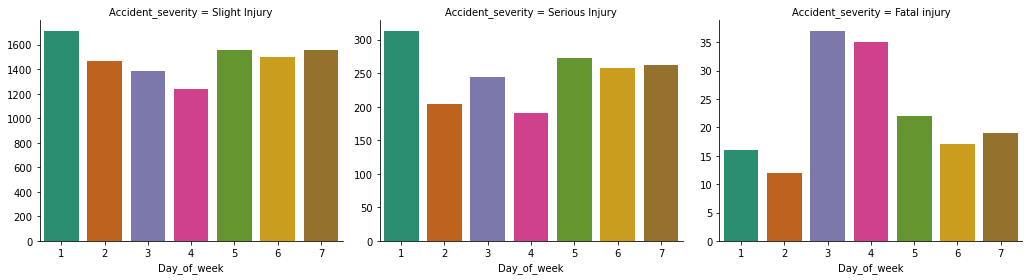

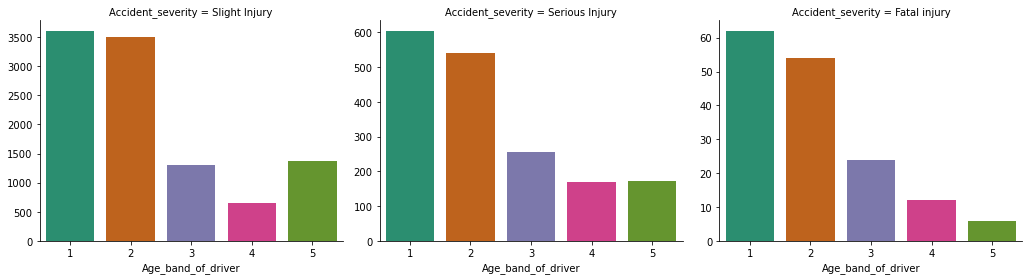

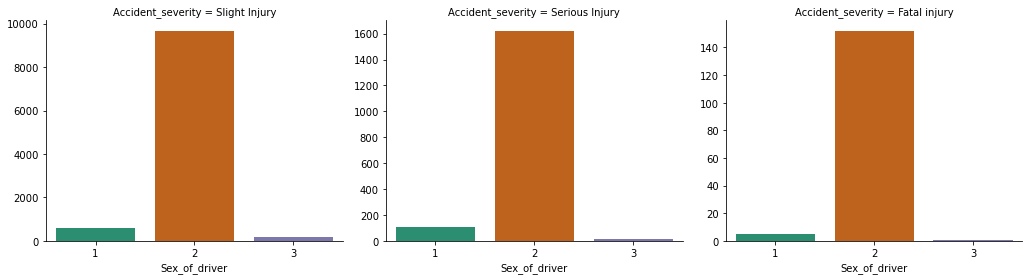

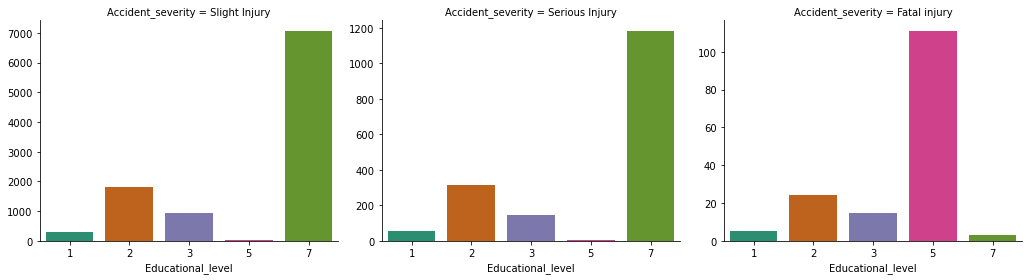

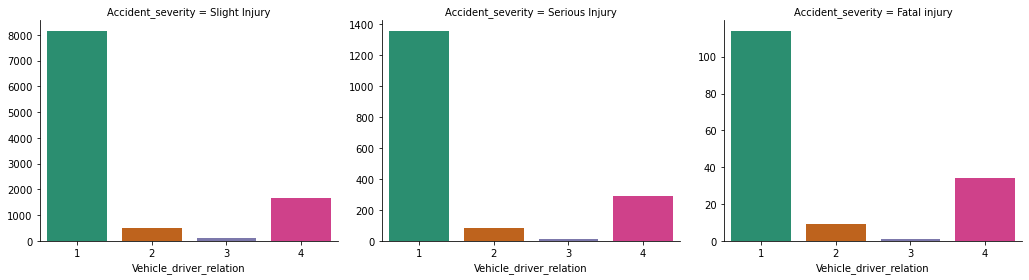

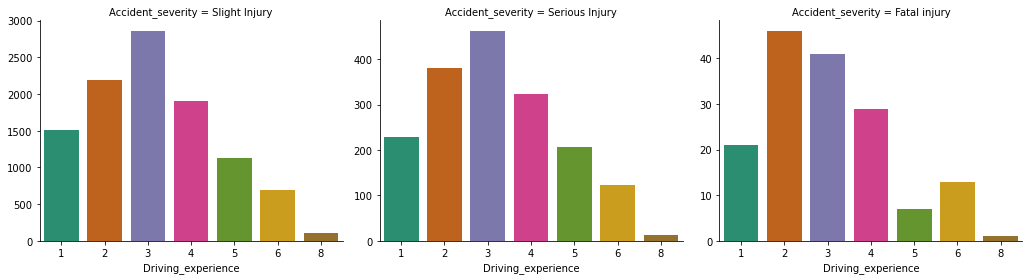

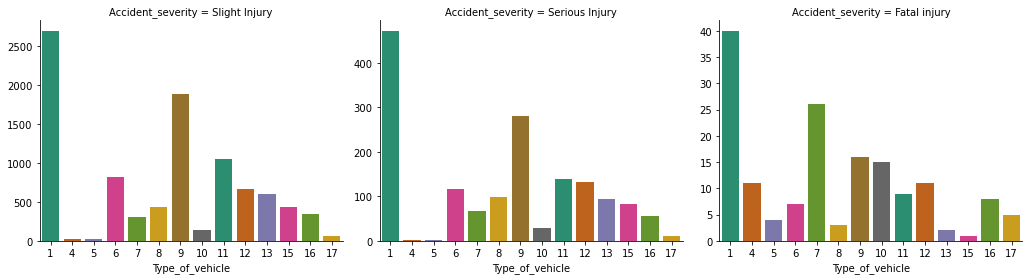

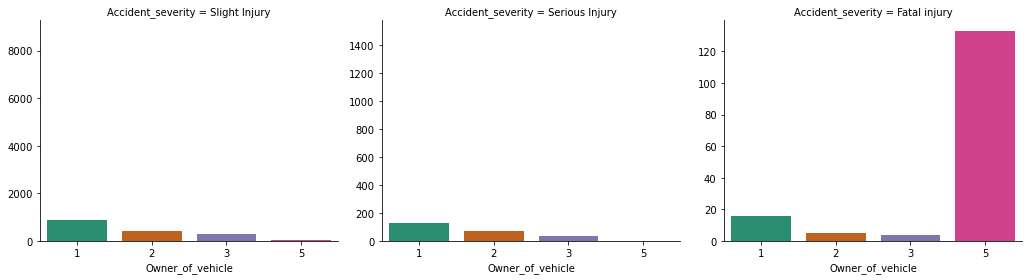

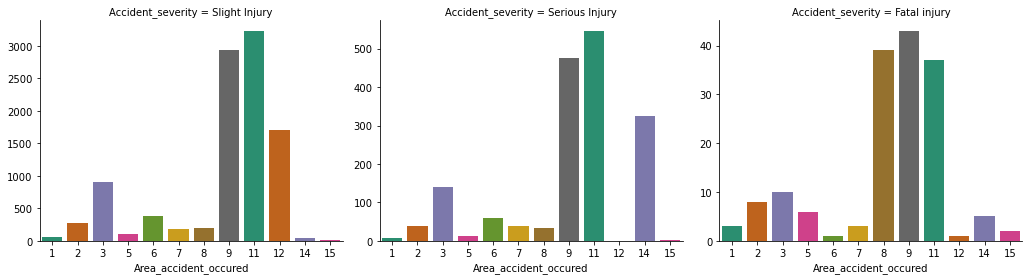

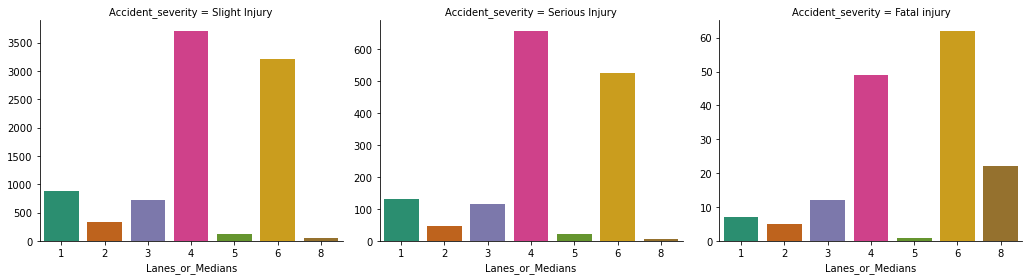

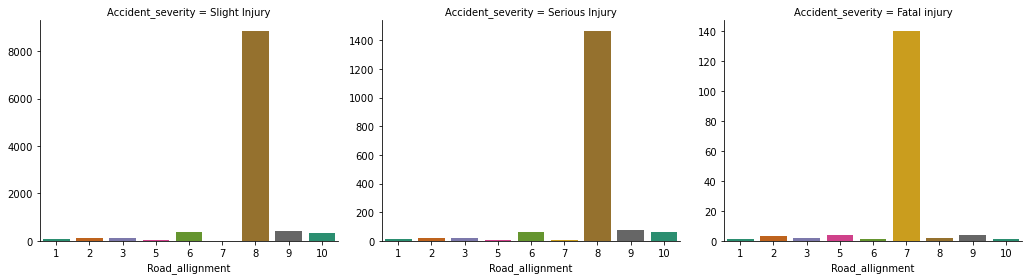

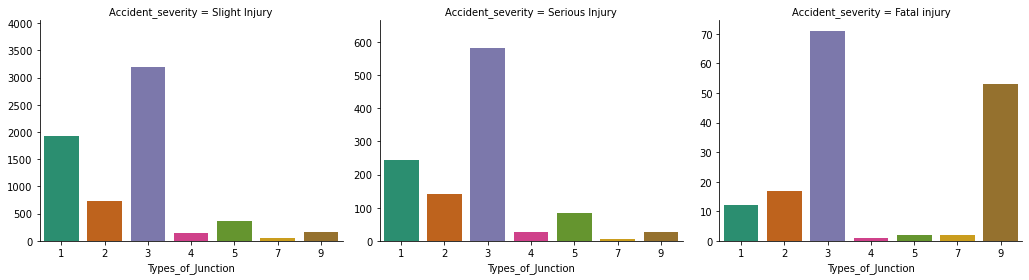

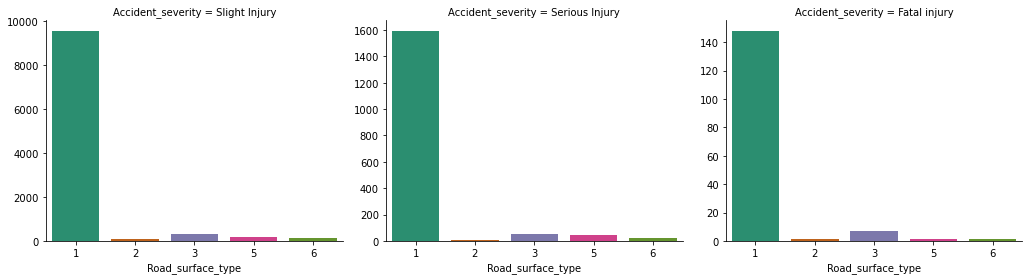

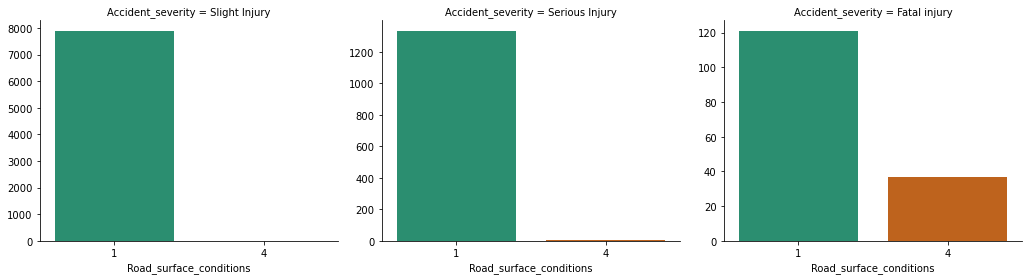

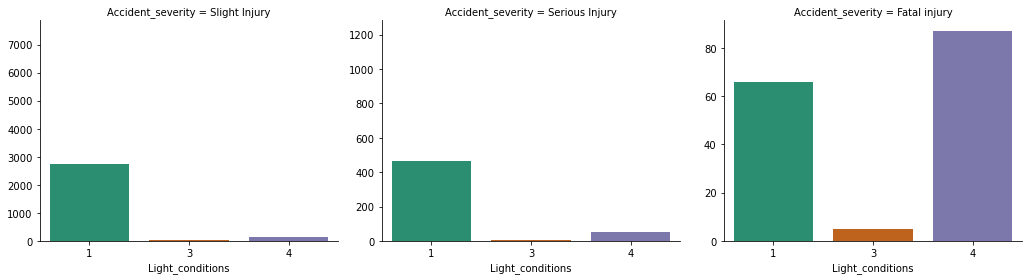

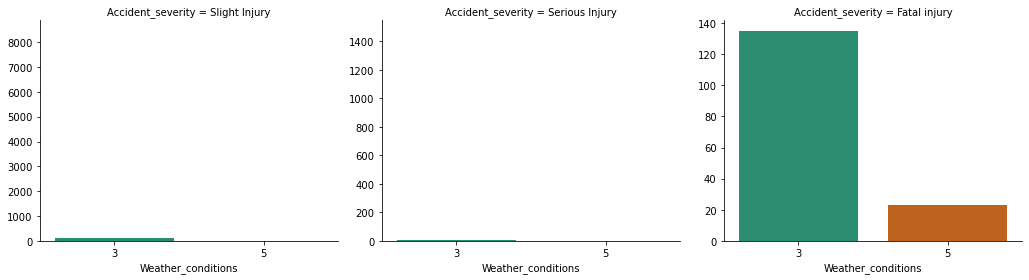

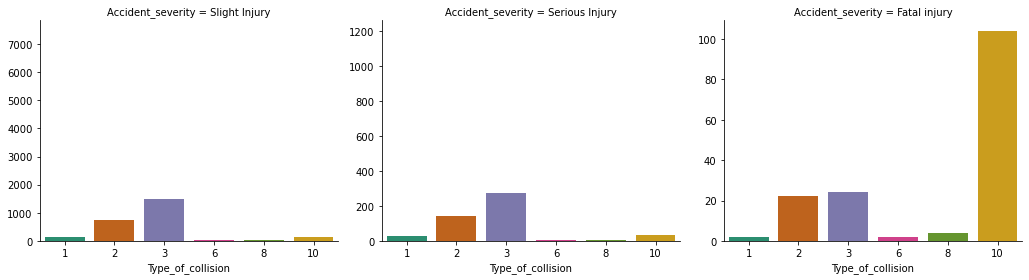

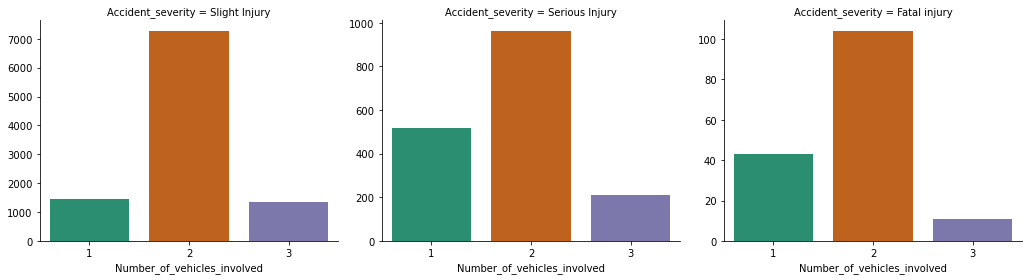

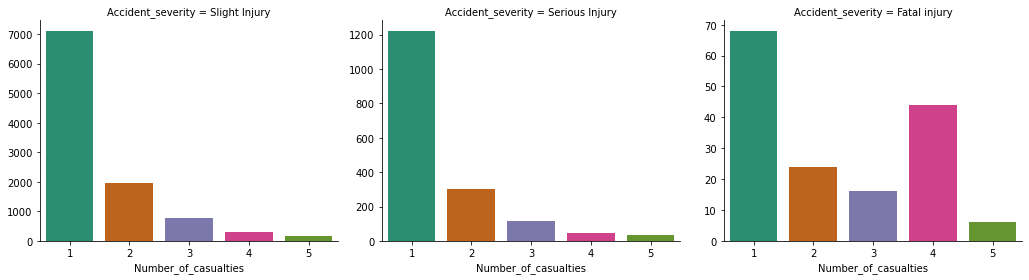

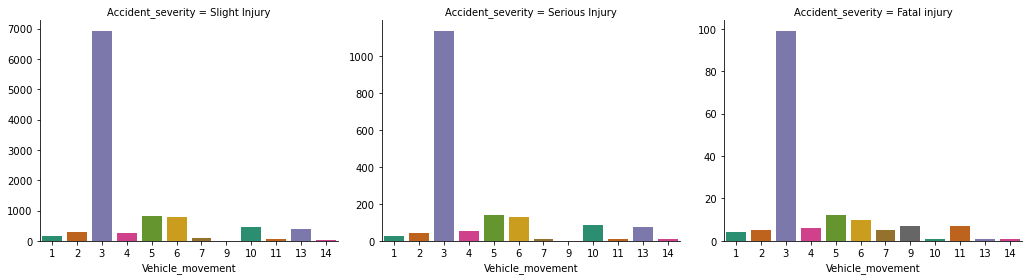

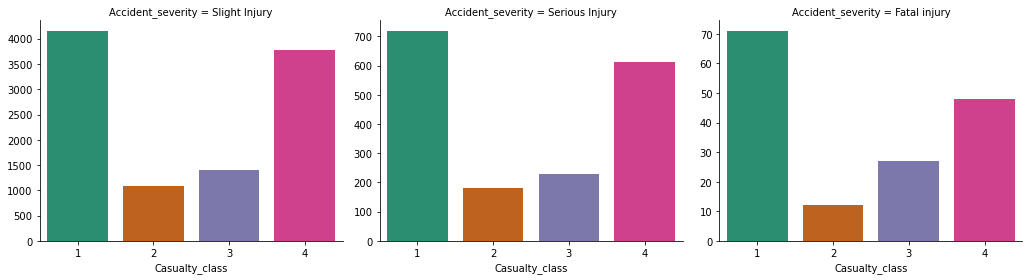

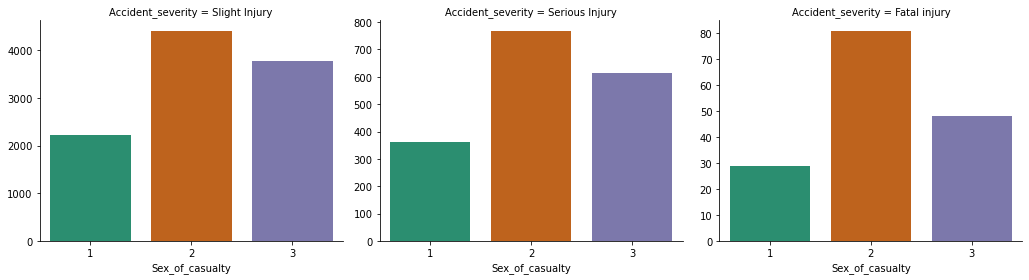

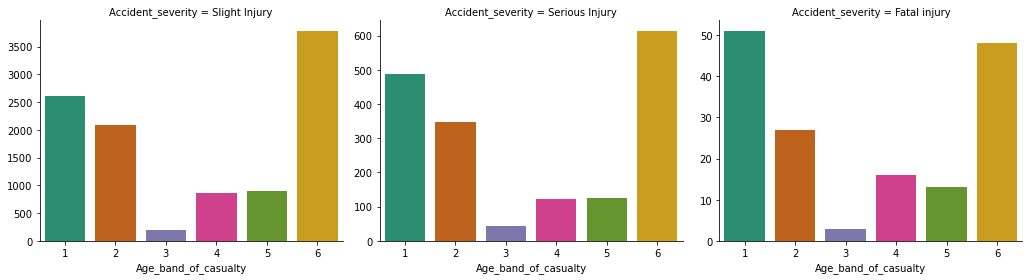

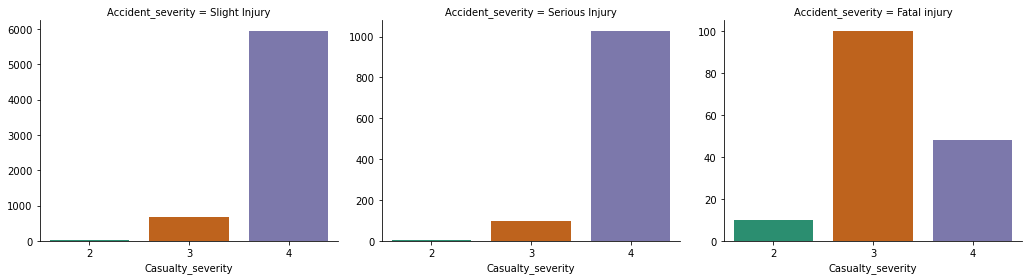

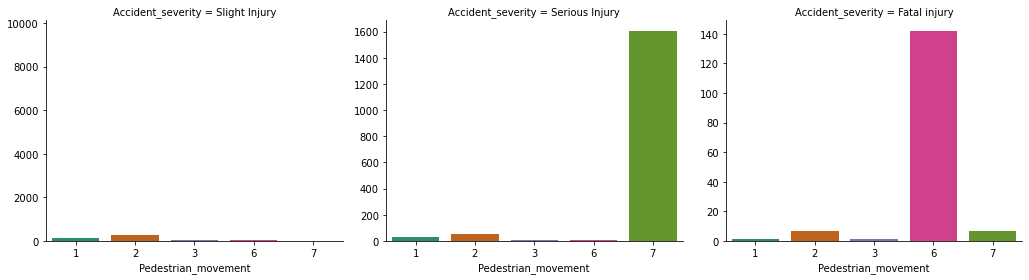

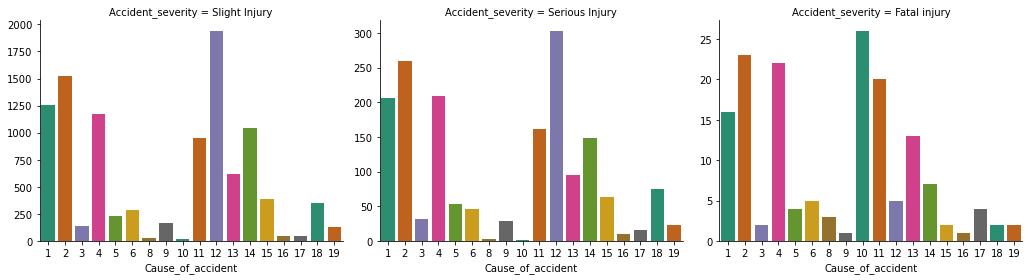

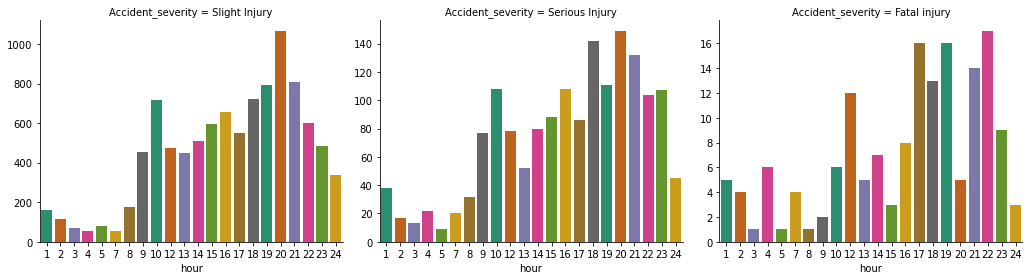

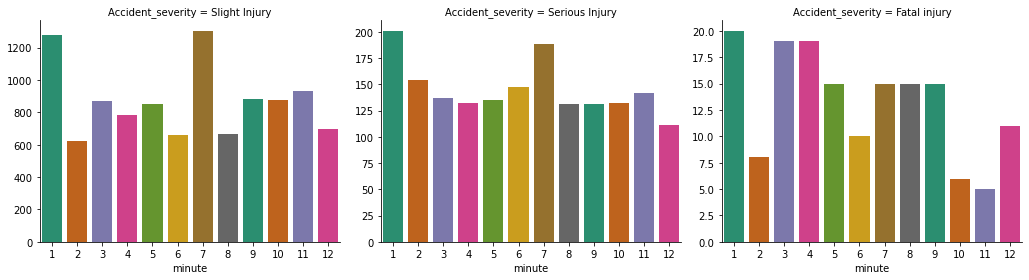

In [32]:
for col in data.drop('Accident_severity',axis = 1):
    g = sns.FacetGrid(data,col = "Accident_severity",size = 4,aspect = 1.2,sharey = False)
    g.map(sns.countplot,col,palette = "Dark2")
    plt.show()

#### Observations:

* Most of the accidents with fatal injuries happened between 2pm to 7pm.
* Most of the accidents with fatal injuries happened on weekends.
* Highest number of non-fatal injuries happened at 5pm.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

<AxesSubplot:>

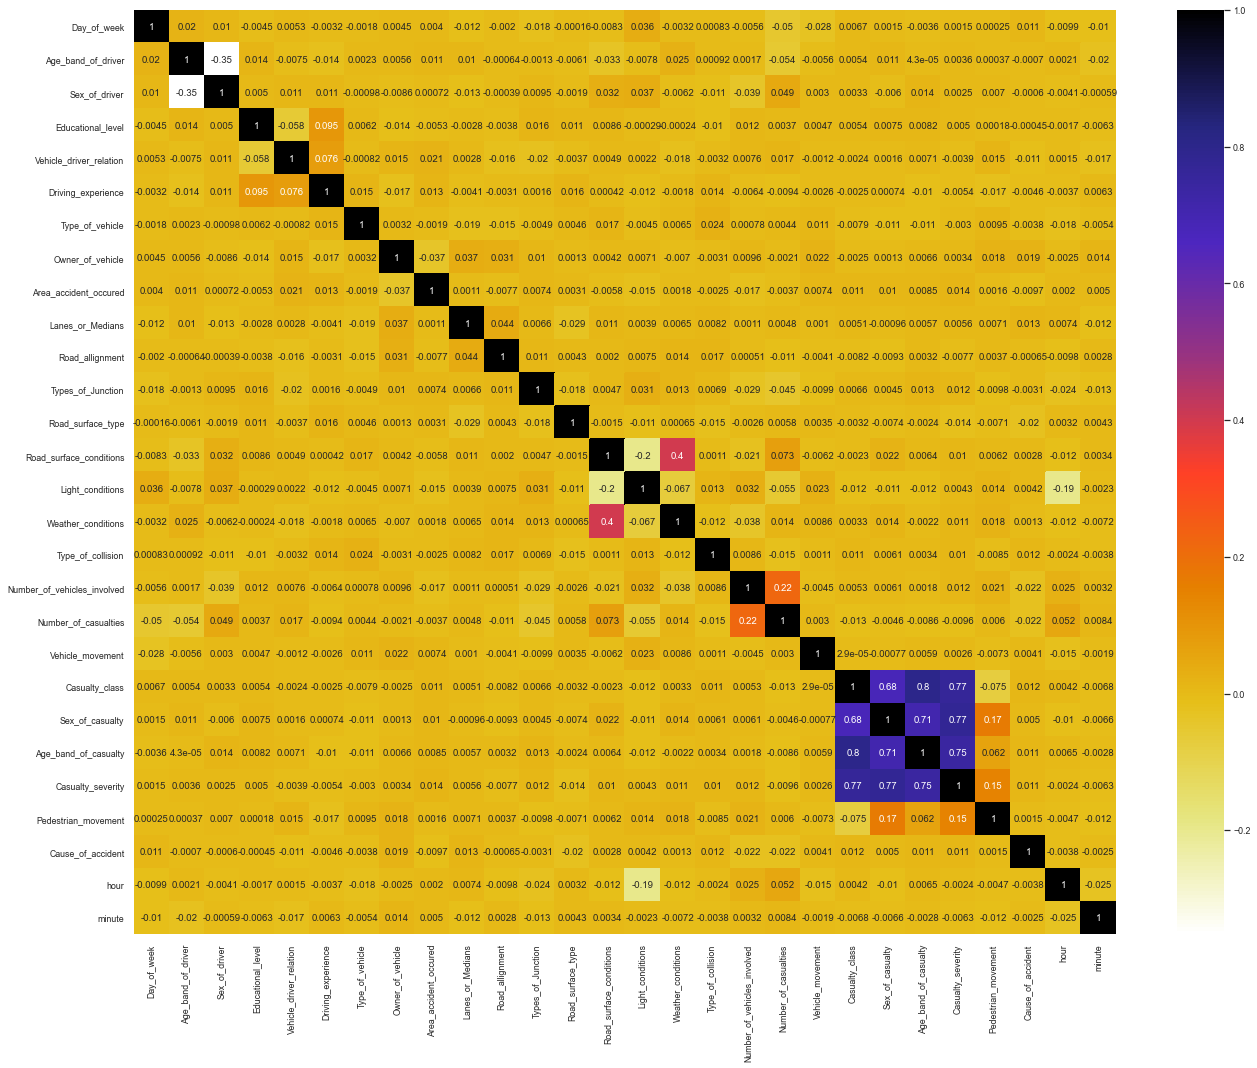

In [33]:
plt.figure(figsize = (22,17))
sns.set(font_scale = 0.8)
sns.heatmap(data.corr(),annot = True,cmap = plt.cm.CMRmap_r)

#### Upsampling

In [34]:
x = data.drop('Accident_severity',axis = 1)
y = data['Accident_severity']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state = 33)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8621, 28) (3695, 28) (8621,) (3695,)


In [35]:
counter = Counter(y_train)

print("--------------------")

for k,v in counter.items():
    per = 100 * v/len(y_train)
    print(f'Class = {k} ,n = {v} ({per: .2f}%)')
    
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)

counter = Counter(y_train)

print("--------------------")

for k,v in counter.items():
    per = 100 * v/len(y_train)
    print(f'Class = {k} ,n = {v} ({per: .2f}%)')
    
print("--------------------")

print("Unsampled data shape",X_train.shape,y_train.shape)

--------------------
Class = Slight Injury ,n = 7255 ( 84.15%)
Class = Serious Injury ,n = 1248 ( 14.48%)
Class = Fatal injury ,n = 118 ( 1.37%)
--------------------
Class = Slight Injury ,n = 7255 ( 33.33%)
Class = Serious Injury ,n = 7255 ( 33.33%)
Class = Fatal injury ,n = 7255 ( 33.33%)
--------------------
Unsampled data shape (21765, 28) (21765,)


In [36]:
y_test = ordinal_encoder(pd.DataFrame(y_test, columns = ['Accident_severity']), pd.DataFrame(y_test, columns = ['Accident_severity']).columns)['Accident_severity']
y_train = ordinal_encoder(pd.DataFrame(y_train, columns = ['Accident_severity']), pd.DataFrame(y_train, columns = ['Accident_severity']).columns)['Accident_severity']

#### Baseline Modelling

In [37]:
def modelling(X_train, y_train, X_test, y_test, **kwargs):
    scores = {}
    models = []
    if 'rf' in kwargs.keys() and kwargs['rf']:
        rf = RandomForestClassifier(n_estimators=200)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        scores['rf']= [accuracy_score(y_test, y_pred)]
#         scores['rf']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(rf)

    if 'extree' in kwargs.keys() and kwargs['extree']:
        extree = ExtraTreesClassifier()
        extree.fit(X_train, y_train)
        y_pred = extree.predict(X_test)
        scores['extree'] = [accuracy_score(y_test, y_pred)]
#         scores['extree']['roc_auc'] = roc_auc_score(y_test, y_pred)
        models.append(extree)
        
    return scores

In [38]:
modelling(X_train,y_train, X_test, y_test, xgb=True, rf=True, extree=True)

{'rf': [0.8124492557510149], 'extree': [0.8230040595399188]}

In [39]:
def model_performance(model, y_test, y_hat) : 
    conf_matrix = confusion_matrix(y_test, y_hat)
    trace1 = go.Heatmap(z = conf_matrix  ,x = ["0 (pred)","1 (pred)", "2 (pred)"],
                        y = ["0 (true)","1 (true)", "2 (true)"],xgap = 2, ygap = 2, 
                        colorscale = 'Viridis', showscale  = False)

    #Show metrics
    Accuracy  =  accuracy_score(y_test, y_hat)
    Precision =  precision_score(y_test, y_pred, average= 'weighted')
    Recall    =  recall_score(y_test, y_pred, average= 'weighted')
    F1_score  =  f1_score(y_test, y_pred, average= 'weighted')

    show_metrics = pd.DataFrame(data=[[Accuracy , Precision, Recall, F1_score]])
    show_metrics = show_metrics.T

    colors = ['gold', 'lightgreen', 'lightcoral', 'lightskyblue']
    trace2 = go.Bar(x = (show_metrics[0].values), 
                   y = ['Accuracy', 'Precision', 'Recall', 'F1_score'], text = np.round_(show_metrics[0].values,4),
                    textposition = 'auto',
                   orientation = 'h', opacity = 0.8,marker=dict(
            color=colors,
            line=dict(color='#000000',width=1.5)))
 
     
    #plots
    model = model
    
    #Subplots
    fig = tls.make_subplots(rows=2, cols=1, print_grid=False, 
                          subplot_titles=('Confusion Matrix',
                                        'Metrics',
                                        ))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,2,1)
    
    fig['layout'].update(showlegend = False, title = '<b>Model performance report</b><br>'+str(model),
                        autosize = True, height = 800,width = 800,
                        plot_bgcolor = 'rgba(240,240,240, 0.95)',
                        paper_bgcolor = 'rgba(240,240,240, 0.95)',
                        # margin = dict(b = 100)
                        )
    fig.layout.titlefont.size = 14
    
    py.iplot(fig)

In [40]:
extree = ExtraTreesClassifier()
extree.fit(X_train, y_train)
y_pred = extree.predict(X_test)

In [41]:
extree.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [42]:
model_performance(extree,y_test, y_pred)

#### Hyperparameter Tuning

In [43]:
gkf = KFold(n_splits=3, shuffle=True, random_state=42).split(X=X_train, y=y_train)

# A parameter grid for XGBoost
params = {
    'n_estimators': range(100, 500, 100),
    'ccp_alpha': [0.0, 0.1],
    'criterion': ['gini'],
    'max_depth': [5,11],
    'min_samples_split': [2,3],
}

extree_estimator = ExtraTreesClassifier()

gsearch = GridSearchCV(
    estimator= extree_estimator,
    param_grid= params,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf,
    verbose=3,
)

extree_model = gsearch.fit(X=X_train, y=y_train)
(gsearch.best_params_, gsearch.best_score_)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'ccp_alpha': 0.0,
  'criterion': 'gini',
  'max_depth': 11,
  'min_samples_split': 3,
  'n_estimators': 400},
 0.8516956690753589)

In [44]:
gkf2 = KFold(n_splits=3, shuffle=True, random_state=101).split(X=X_train, y=y_train)

params2 = {
    'n_estimators': range(400, 800, 100),
    'max_depth': [11,15],
    'min_samples_split': [2,3],
    'class_weight': ['balanced', None],

}

extree2 = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                max_depth = 11,
                                min_samples_split = 3,
                                n_estimators = 400)

gsearch2 = GridSearchCV(
    estimator= extree2,
    param_grid= params2,
    scoring='f1_weighted',
    n_jobs=-1,
    cv=gkf2,
    verbose=3,
)

extree_model2 = gsearch2.fit(X=X_train, y=y_train)

(gsearch2.best_params_, gsearch2.best_score_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


({'class_weight': 'balanced',
  'max_depth': 15,
  'min_samples_split': 2,
  'n_estimators': 600},
 0.9134848518893085)

In [45]:
extree_tuned = ExtraTreesClassifier(ccp_alpha = 0.0,
                                criterion = 'gini',
                                min_samples_split = 2,
                                class_weight = 'balanced',
                                max_depth = 15,
                                n_estimators = 400)

extree_tuned.fit(X_train, y_train)
y_pred_tuned = extree_tuned.predict(X_test)